#1. 실험요약
UCI Machine Learning Repository에 있는 Mushroom datdaset에 대하여, ML 모델들이 Mushroom dataset의 feature들을 가지고 Edible한 mushroom인지 Poisonous한 mushroom인지 구분해낼 수 있는 지를 실험해보았습니다. 실험에는 Decision Tree, Regression, MLP, KNeighborsClassifier, RandomForest 총 5가지 모델을 이용했습니다.

#2. 라이브러리 선언

In [107]:
import pandas as pd
from IPython.display import Image
import pydotplus
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from io import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.ensemble import RandomForestClassifier

#3. 선정한 데이터
선정한 Dataset: Mushroom

https://archive.ics.uci.edu/ml/datasets/Mushroom

위의 URL에 있는 dataset을 다운받아 feature들을 naming한 후 csv파일로 변환하여 github업로드 하였고, 이를 불러오는 식으로 데이터셋을 가져왔습니다.

In [24]:
url = "https://raw.githubusercontent.com/2017130715/class2021Fall/main/mushroom.csv"
data = pd.read_csv(url)

##3-1. 데이터셋 분석

선정한 데이터셋은 Agaricus종과 Lepiota종에 속해 있는 버섯들에 대한 데이터입니다.

데이터들의 feature는 다음과 같습니다.

0. Edible(식용 가능 여부): Edible=e, Poisonous=p
1. cap-shape(갓 모양): bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface(갓 표면): fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color(갓 색깔): brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises(멍자국 유무): bruises=t,no=f
5. odo(향): almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment(주름살 부착상태): attached=a,descending=d,free=f,notched=n
7. gill-spacing(주름살 분포): close=c,crowded=w,distant=d
8. gill-size(주름살 크기): broad=b,narrow=n
9. gill-color(주름살 색깔): black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape(줄기모양): enlarging=e,tapering=t
11. stalk-root(줄기~뿌리): bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring(턱받이 위 줄기 표면): fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring(턱받이 아래 줄기 표면): fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring(턱받이 위 줄기 색깔): brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring(턱받이 아래 줄기 색깔): brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type(갓 덮개 타입): partial=p,universal=u
17. veil-color(갓 덮개 색): brown=n,orange=o,white=w,yellow=y
18. ring-number(턱받이 수): none=n,one=o,two=t
19. ring-type(턱받이 타입): cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color(포자 색): black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population(개체 수): abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat(서식지): grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

ML 모델들이 위와 같은 데이터셋에 대하여 edible한지, poisonous한지 구분할 수 있는가에 실험의 목적이 있기 때문에 output에 해당하는 feature는 Edible, 그 외 나머지 feature들을 input에 해당합니다.




##3-2. 데이터 전처리

Feature들의 type이 object이기 때문에 정수형으로 encoding을 진행합니다.

In [25]:
data.dtypes

Edible                      object
cap_shape                   object
cap_surface                 object
cap_color                   object
bruises                     object
oder                        object
gill_attachment             object
gill_spacing                object
gill_size                   object
gill_color                  object
stalk_shape                 object
stalk_root                  object
stalk_surface_above_ring    object
stalk_surface_below_ring    object
stalk_color_above_ring      object
stalk_color_below_ring      object
veil_type                   object
veil_color                  object
ring_number                 object
ring_type                   object
spore_print_color           object
population                  object
habitat                     object
dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Edible = le.fit_transform(data.Edible)
data.cap_shape = le.fit_transform(data.cap_shape)
data.cap_surface = le.fit_transform(data.cap_surface)
data.cap_color = le.fit_transform(data.cap_color)
data.bruises = le.fit_transform(data.bruises)
data.oder = le.fit_transform(data.oder)
data.gill_attachment = le.fit_transform(data.gill_attachment)
data.gill_spacing = le.fit_transform(data.gill_spacing)
data.gill_size = le.fit_transform(data.gill_size)
data.gill_color = le.fit_transform(data.gill_color)
data.stalk_shape = le.fit_transform(data.stalk_shape)
data.stalk_root = le.fit_transform(data.stalk_root)
data.stalk_surface_above_ring = le.fit_transform(data.stalk_surface_above_ring)
data.stalk_surface_below_ring = le.fit_transform(data.stalk_surface_below_ring)
data.stalk_color_above_ring = le.fit_transform(data.stalk_color_above_ring)
data.stalk_color_below_ring = le.fit_transform(data.stalk_color_below_ring)
data.veil_type = le.fit_transform(data.veil_type)
data.veil_color = le.fit_transform(data.veil_color)
data.ring_number = le.fit_transform(data.ring_number)
data.ring_type = le.fit_transform(data.ring_type)
data.spore_print_color = le.fit_transform(data.spore_print_color)
data.population = le.fit_transform(data.population)
data.habitat = le.fit_transform(data.habitat)


In [27]:
data.dtypes

Edible                      int64
cap_shape                   int64
cap_surface                 int64
cap_color                   int64
bruises                     int64
oder                        int64
gill_attachment             int64
gill_spacing                int64
gill_size                   int64
gill_color                  int64
stalk_shape                 int64
stalk_root                  int64
stalk_surface_above_ring    int64
stalk_surface_below_ring    int64
stalk_color_above_ring      int64
stalk_color_below_ring      int64
veil_type                   int64
veil_color                  int64
ring_number                 int64
ring_type                   int64
spore_print_color           int64
population                  int64
habitat                     int64
dtype: object

In [28]:
#데이터에 NULL값이 있는지 확인합니다.
data.isnull().any()

Edible                      False
cap_shape                   False
cap_surface                 False
cap_color                   False
bruises                     False
oder                        False
gill_attachment             False
gill_spacing                False
gill_size                   False
gill_color                  False
stalk_shape                 False
stalk_root                  False
stalk_surface_above_ring    False
stalk_surface_below_ring    False
stalk_color_above_ring      False
stalk_color_below_ring      False
veil_type                   False
veil_color                  False
ring_number                 False
ring_type                   False
spore_print_color           False
population                  False
habitat                     False
dtype: bool

In [8]:
data.head()

,Edible,cap_shape,cap_surface,cap_color,bruises,oder,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [9]:
#데이터를 Label(y)와 Feature들(x)로 나눠줍니다.
y = data[['Edible']]
x = data.drop(columns=['Edible'])

#데이터를 train data와 test data로 나눠줍니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

#4. 실험

##4-1. Decision Tree

###모델 선정 이유

대표적인 classification model 중 하나인 Decision Tree가 주어진 feature들을 활용하여 edible한 mushroom을 구분할 수 있는지 확인하고자 하였습니다.

###실험 진행

In [64]:
#DT 모델 생성
dt1 = DecisionTreeClassifier(random_state=42)

#생성한 model에 대해 train data를 적용하고, 결과에 대한 cv score를 출력합니다.
print('score:', cross_val_score(dt1, x_train, y_train, cv=5).mean())

score: 1.0


DT Classifier가 주어진 데이터셋에 대해 default parameter만을 가지고도 완벽한 분류를 한다는 결과가 도출되었습니다. 그래도 parameter가 변경됨에 따라 어떻게 결과가 바뀌는지에 대해 알아보고자 parameter를 변경해가며 cv score를 산출해보았습니다.

In [92]:
dt2 = DecisionTreeClassifier(random_state=42, max_leaf_nodes=50)
print('score:', cross_val_score(dt2, x_train, y_train, cv=5).mean())

dt3 = DecisionTreeClassifier(random_state=42, min_impurity_decrease=0.0004)
print('score:', cross_val_score(dt3, x_train, y_train, cv=5).mean())

dt4 = DecisionTreeClassifier(random_state=42, max_depth=15)
print('score:', cross_val_score(dt4, x_train, y_train, cv=5).mean())

score: 1.0
score: 1.0
score: 1.0


조정된 parameter에 대해서도 같은 결과를 보입니다. 다음으로는 feature selection을 한 후 적용시켜보았습니다.

###Feature selection

In [136]:
#k-best feature selection
x_train_dt1_kbest1 = SelectKBest(chi2, k=3).fit_transform(x_train, y_train)
print('score', cross_val_score(dt1, x_train_dt1_kbest1, y_train, cv=5).mean())

x_train_dt1_kbest2 = SelectKBest(chi2, k=5).fit_transform(x_train, y_train)
print('score', cross_val_score(dt1, x_train_dt1_kbest2, y_train, cv=5).mean())

x_train_dt1_kbest3 = SelectKBest(chi2, k=8).fit_transform(x_train, y_train)
print('score', cross_val_score(dt1, x_train_dt1_kbest3, y_train, cv=5).mean())

score 0.9444234743482138
score 0.9718602433252492
score 1.0


In [95]:
#모델 기반 feature selection
select_dt1 = SelectFromModel(dt1, threshold='median')
select_dt1.fit(x_train, y_train)
x_train_dt1 = select.transform(x_train)
print('score', cross_val_score(dt1, x_train_dt1, y_train, cv=5).mean())

score 0.9957794461112321


feature selection을 적용한 경우, 모델의 성능이 낮아지는 것을 관찰할 수 있었습니다.

###결과

accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


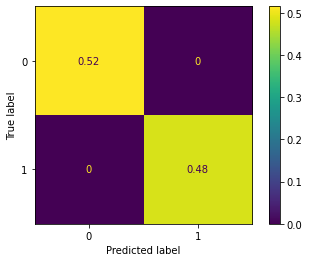

In [58]:
#모델을 fit
dt1.fit(x_train, y_train)
print('accuracy:', dt1.score(x_test, y_test))

#confusion matrix 출력
y_pred_dt1 = dt1.predict(x_test)
confusion_matrix(y_test, y_pred_dt1)
plot_confusion_matrix(dt1, x_test, y_test, normalize='all')

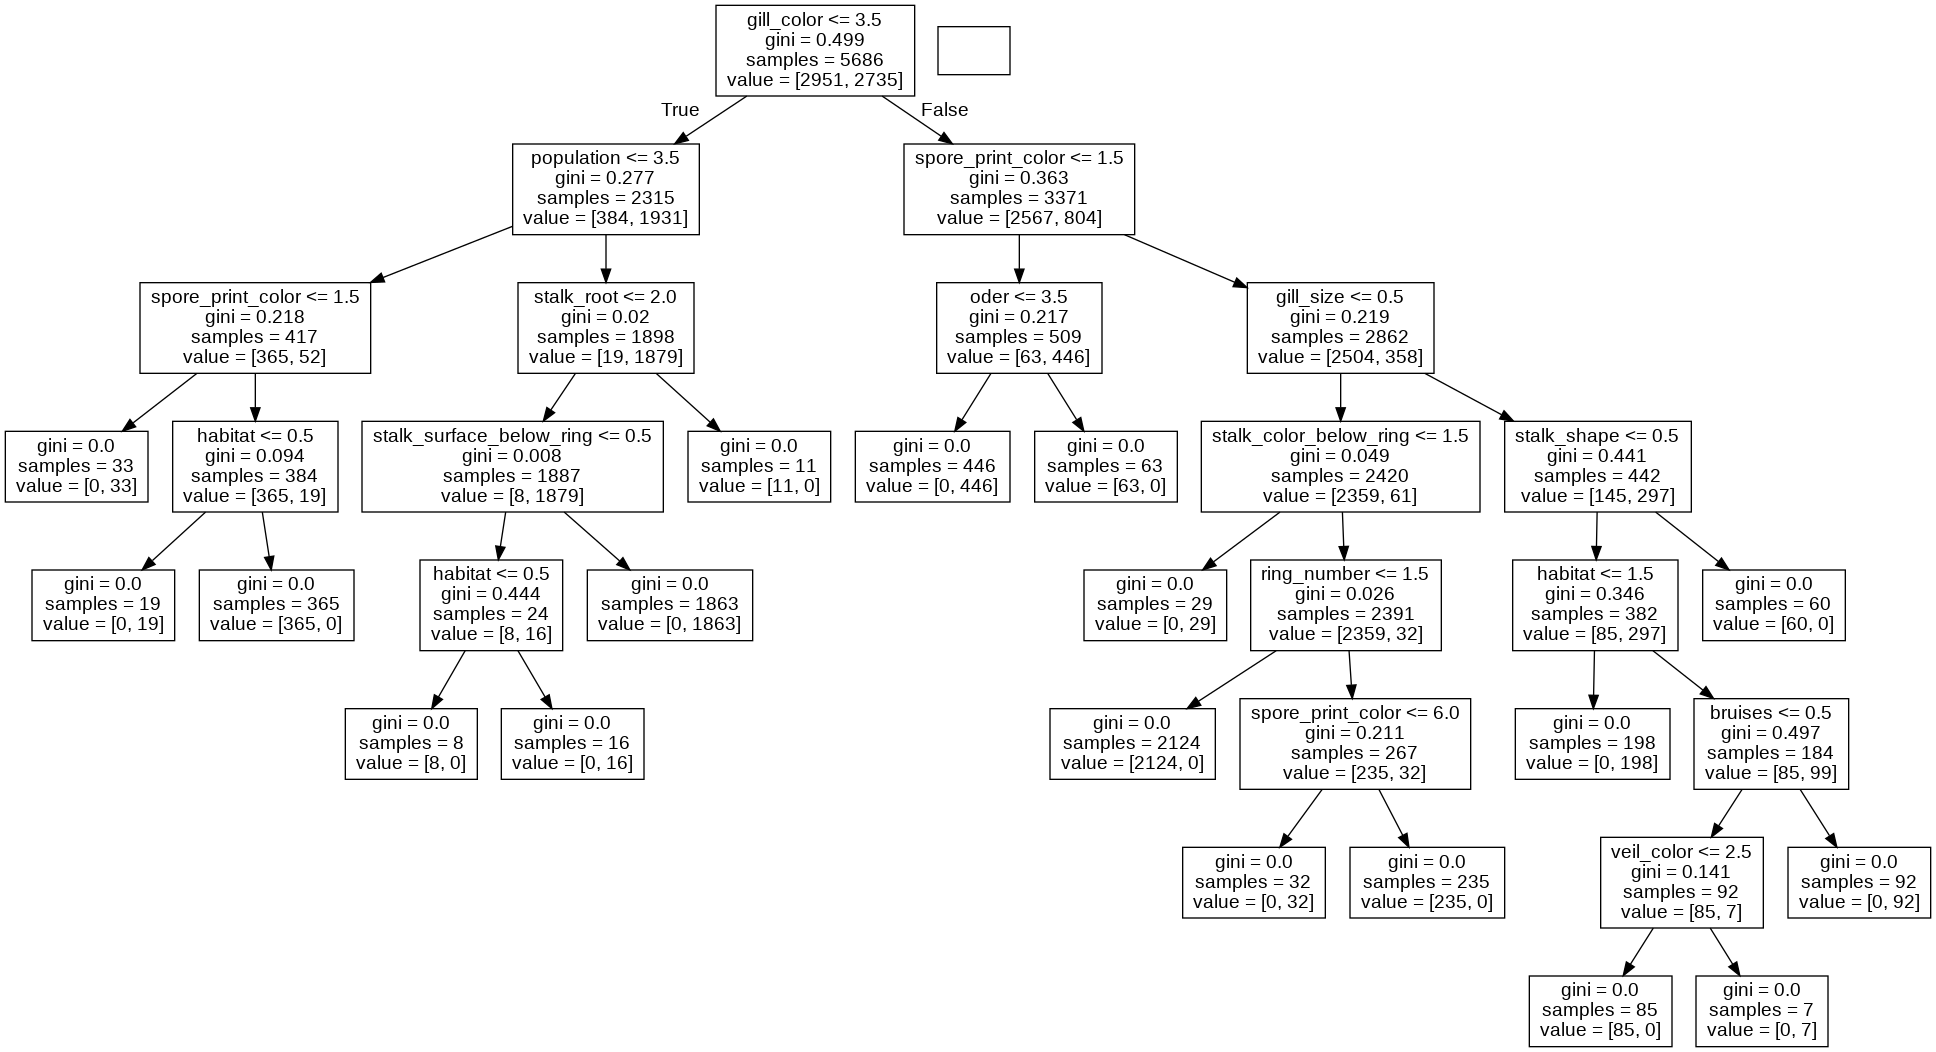

In [62]:
#해당 DT가 어떻게 구성되었는지 출력해보았습니다.
dot_data = StringIO()
export_graphviz(dt1, feature_names=x_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

##4-2. LogisticRegression

###모델 선정 이유

Regression model중에서 classify 기능을 담고 있는 logistic regression이 해당 데이터에 대해 어느정도의 성능을 보이는지 확인하고자 하였습니다.

###실험 진행

In [85]:
#Logistic Regression 모델 생성
lr1 = LogisticRegression(max_iter=1000)

#생성한 model에 대해 train data를 적용하고, 결과에 대한 cv score를 출력합니다.
print('score', cross_val_score(lr1, x_train, y_train.values.ravel(), cv=5).mean())

score 0.9475886192660055


parameter를 조정해가면서 어떤 결과값이 산출되는지 확인해보았습니다.

In [67]:
lr2 = LogisticRegression(max_iter=500)
print('score', cross_val_score(lr2, x_train, y_train.values.ravel(), cv=5).mean())

lr3 = LogisticRegression(max_iter=1500)
print('score', cross_val_score(lr3, x_train, y_train.values.ravel(), cv=5).mean())

lr4 = LogisticRegression(max_iter=2000)
print('score', cross_val_score(lr4, x_train, y_train.values.ravel(), cv=5).mean())

lr5 = LogisticRegression(max_iter=2500)
print('score', cross_val_score(lr5, x_train, y_train.values.ravel(), cv=5).mean())

score 0.9475886192660055
score 0.9475886192660055
score 0.9475886192660055
score 0.9475886192660055


###Feature selection

조정된 parameter들에 대해 모두 같은 결과가 나왔고, 이번엔 feature selection을 적용해보았습니다.


In [137]:
#k-best feature selection
x_train_lr_kbest1 = SelectKBest(chi2, k=3).fit_transform(x_train, y_train.values.ravel())
print('score', cross_val_score(lr1, x_train_lr_kbest1, y_train.values.ravel(), cv=5).mean())

x_train_lr_kbest2 = SelectKBest(chi2, k=5).fit_transform(x_train, y_train.values.ravel())
print('score', cross_val_score(lr1, x_train_lr_kbest2, y_train.values.ravel(), cv=5).mean())

x_train_lr_kbest3 = SelectKBest(chi2, k=8).fit_transform(x_train, y_train.values.ravel())
print('score', cross_val_score(lr1, x_train_lr_kbest3, y_train.values.ravel(), cv=5).mean())

score 0.7650357908534314
score 0.8061922581702226
score 0.9224387242968192


In [82]:
#모델 기반 feature selection
select_lr = SelectFromModel(lr1, threshold='median')
select_lr.fit(x_train, y_train.values.ravel())
x_train_lr = select.transform(x_train)
print('score', cross_val_score(lr1, x_train_lr, y_train.values.ravel(), cv=5).mean())

score 0.9467097300731273


feature selection을 적용한 결과, 전반적으로 model의 성능이 낮아진 것을 관찰할 수 있었습니다.

###결과

accuracy: 0.9491386382280558


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


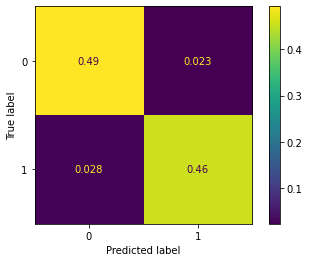

In [116]:
#모델을 fit
lr1.fit(x_train, y_train.values.ravel())
print('accuracy:', lr1.score(x_test, y_test.values.ravel()))

#confusion matrix 출력
y_pred_lr1 = lr1.predict(x_test)
confusion_matrix(y_test, y_pred_lr1)
plot_confusion_matrix(lr1, x_test, y_test.values.ravel(), normalize='all')

##4-3. MLP

###모델 선정 이유

MLP의 경우 weight와 gradient descent를 사용하는 방식으로, classification 모델로서 좋은 성능을 기대할 수 있는 모델 중 하나입니다. MLP가 mushroom 데이터셋에 대해서도 좋은 성능의 classfication을 할 수 있는지 확인하기 위해 진행하였습니다.

In [101]:
#MLP 모델 생성
mlp1 = MLPClassifier(random_state=42, max_iter=1000)

#생성한 model에 대해 train data를 적용하고, 결과에 대한 cv score를 출력합니다.
print('score', cross_val_score(mlp1, x_train, y_train.values.ravel(), cv=5).mean())

score 1.0


MLP model이 주어진 데이터셋에 대해 default parameter만을 가지고도 완벽한 분류를 한다는 결과가 도출되었습니다. 그래도 parameter가 변경됨에 따라 어떻게 결과가 바뀌는지에 대해 알아보고자 parameter를 변경해가며 cv score를 산출해보았습니다.

In [98]:
mlp2 = MLPClassifier(random_state=42, hidden_layer_sizes=(40,), max_iter=1000)
print('score:', cross_val_score(mlp2, x_train, y_train.values.ravel(), cv=5).mean())

mlp3 = MLPClassifier(random_state=42, hidden_layer_sizes=(60,), max_iter=1000)
print('score:', cross_val_score(mlp3, x_train, y_train.values.ravel(), cv=5).mean())

mlp4 = MLPClassifier(random_state=42, hidden_layer_sizes=(80,), max_iter=1500)
print('score:', cross_val_score(mlp4, x_train, y_train.values.ravel(), cv=5).mean())

mlp5 = MLPClassifier(random_state=42, hidden_layer_sizes=(90,), max_iter=2000)
print('score:', cross_val_score(mlp5, x_train, y_train.values.ravel(), cv=5).mean())

score: 1.0
score: 1.0
score: 1.0
score: 1.0


###Feature selection

parameter가 조정된 model들도 완벽한 분류를 해낸다는 결과를 관찰할 수 있었습니다. 다음으로는 위의 다른 model들과 마찬가지로 feature selection도 적용시켜보았습니다.

In [138]:
#k-best feature selection
x_train_mlp1_kbest1 = SelectKBest(chi2, k=3).fit_transform(x_train, y_train.values.ravel())
print('score', cross_val_score(mlp1, x_train_mlp1_kbest1, y_train.values.ravel(), cv=5).mean())

x_train_mlp1_kbest2 = SelectKBest(chi2, k=5).fit_transform(x_train, y_train.values.ravel())
print('score', cross_val_score(mlp1, x_train_mlp1_kbest2, y_train.values.ravel(), cv=5).mean())

x_train_mlp1_kbest3 = SelectKBest(chi2, k=8).fit_transform(x_train, y_train.values.ravel())
print('score', cross_val_score(mlp1, x_train_mlp1_kbest3, y_train.values.ravel(), cv=5).mean())

score 0.9407295429497969
score 0.9672868044510189
score 1.0


In [103]:
#모델 기반 feature selection
select_mlp1 = SelectFromModel(mlp1, threshold='median')
select_mlp1.fit(x_train, y_train.values.ravel())
x_train_mlp1 = select.transform(x_train)
print('score', cross_val_score(mlp1, x_train_mlp1, y_train.values.ravel(), cv=5).mean())

score 0.9943722341499305


위의 다른 모델들과 마찬가지로 feature selection을 적용한 경우, 모델의 성능이 낮아지는 것을 관찰할 수 있었습니다.

###결과

accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


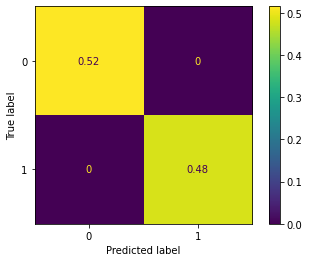

In [115]:
#모델을 fit
mlp1.fit(x_train, y_train.values.ravel())
print('accuracy:', mlp1.score(x_test, y_test.values.ravel()))

#confusion matrix 출력
y_pred_mlp1 = mlp1.predict(x_test)
confusion_matrix(y_test, y_pred_mlp1)
plot_confusion_matrix(mlp1, x_test, y_test.values.ravel(), normalize='all')

##4-4. KNeighborsClassifier

###모델 선정 이유

다음으로는 가까운 데이터를 기준으로 데이터를 분류하는 KNeighborsClassifier의 해당 데이터셋에 대한 성능을 확인하고자 하였습니다.

###실험 진행

In [141]:
#KNN 모델 생성
knn1 = KNeighborsClassifier()

#생성한 model에 대해 train data를 적용하고, 결과에 대한 cv score를 출력합니다.
print('score:', cross_val_score(knn1, x_train, y_train.values.ravel(), cv=5).mean())

score: 0.9973616321432933


parameter를 조정해가면서 어떤 결과값이 산출되는지 확인해보았습니다.

In [143]:
knn2 = KNeighborsClassifier(n_neighbors=6)
print('score:', cross_val_score(knn2, x_train, y_train.values.ravel(), cv=5).mean())

knn3 = KNeighborsClassifier(n_neighbors=9)
print('score:', cross_val_score(knn3, x_train, y_train.values.ravel(), cv=5).mean())

knn4 = KNeighborsClassifier(n_neighbors=12)
print('score:', cross_val_score(knn3, x_train, y_train.values.ravel(), cv=5).mean())

score: 0.9954268702672373
score: 0.9941957143718323
score: 0.9941957143718323


parameter가 조정됨에 따라 성능이 낮아지고, 일정 수준을 넘어가면 동일한 성능을 보이는 것으로 관찰되었습니다.

###Feature selection

위의 다른 모델들과 마찬가지로 feature selection도 적용시켜보았습니다.

In [147]:
#k-best feature selection
x_train_knn1_kbest1 = SelectKBest(chi2, k=3).fit_transform(x_train, y_train.values.ravel())
print('score', cross_val_score(knn1, x_train_knn1_kbest1, y_train.values.ravel(), cv=5).mean())

x_train_knn1_kbest2 = SelectKBest(chi2, k=5).fit_transform(x_train, y_train.values.ravel())
print('score', cross_val_score(knn1, x_train_knn1_kbest2, y_train.values.ravel(), cv=5).mean())

x_train_knn1_kbest3 = SelectKBest(chi2, k=8).fit_transform(x_train, y_train.values.ravel())
print('score', cross_val_score(knn1, x_train_knn1_kbest3, y_train.values.ravel(), cv=5).mean())

score 0.9289549627252676
score 0.971332693410495
score 0.9989447455997575


In [145]:
#모델 기반 feature selection
select_knn1 = SelectFromModel(knn1, threshold='median')
select_knn1.fit(x_train, y_train.values.ravel())
x_train_knn1 = select.transform(x_train)
print('score', cross_val_score(knn1, x_train_knn1, y_train.values.ravel(), cv=5).mean())

score 0.9899746967708627


k-best feature selection의 경우 위 모델들과 마찬가지로 선정되는 feature의 개수가 많아질수록 성능이 높아지는 것이 관찰되었습니다. 위의 모델들과 다른 점은 기존 model 자체가 100%성능을 보이지 않는 만큼 feature selection을 통해 선정된 feature의 개수가 늘어남에 따라 기존 model보다 성능이 높은 경우도 발생하였는 것입니다. 모델 기반 feature selection의 경우는 다른 모델들과 마찬가지로 기존 모델보다 성능이 낮아지는 것이 관찰되었습니다.

###결과

accuracy: 0.9958982772764561


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


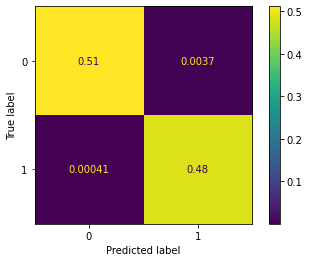

In [146]:
#모델을 fit
knn1.fit(x_train, y_train.values.ravel())
print('accuracy:', knn1.score(x_test, y_test.values.ravel()))

#confusion matrix 출력
y_pred_knn1 = knn1.predict(x_test)
confusion_matrix(y_test, y_pred_knn1)
plot_confusion_matrix(knn1, x_test, y_test.values.ravel(), normalize='all')

##4-5. Random Forest

###모델 선정 이유

Classification 모델과 Regression 모델에 이어 앙상블 모델 중 하나인 Random forest가 Mushroom 데이터셋에 어느정도의 성능을 보이는지 확인하고자 하였습니다.

###실험 진행

In [111]:
#RF 모델 생성
rf1 = RandomForestClassifier(random_state=42)

#생성한 model에 대해 train data를 적용하고, 결과에 대한 cv score를 출력합니다.
print('score:', cross_val_score(rf1, x_train, y_train.values.ravel(), cv=5).mean())

score: 1.0


parameter를 조정해가면서 어떤 결과값이 산출되는지 확인해보았습니다.

In [112]:
rf2 = RandomForestClassifier(n_estimators=150, max_depth=20, random_state=42)
print('score:', cross_val_score(rf2, x_train, y_train.values.ravel(), cv=5).mean())

rf3 = RandomForestClassifier(n_estimators=200, min_samples_leaf=2, random_state=42)
print('score:', cross_val_score(rf3, x_train, y_train.values.ravel(), cv=5).mean())

rf4 = RandomForestClassifier(n_estimators=250, min_samples_split=3, random_state=42)
print('score:', cross_val_score(rf4, x_train, y_train.values.ravel(), cv=5).mean())

rf5 = RandomForestClassifier(n_estimators=300, random_state=42)
print('score:', cross_val_score(rf5, x_train, y_train.values.ravel(), cv=5).mean())

score: 1.0
score: 1.0
score: 1.0
score: 1.0


조정된 parameter에 대한 모델들도 같은 결과값을 산출한다는 것을 확인하였습니다.

###Feature selection

위의 다른 모델들과 마찬가지로 feature selection도 적용시켜보았습니다.

In [139]:
#k-best feature selection
x_train_rf1_kbest1 = SelectKBest(chi2, k=3).fit_transform(x_train, y_train.values.ravel())
print('score', cross_val_score(rf1, x_train_rf1_kbest1, y_train.values.ravel(), cv=5).mean())

x_train_rf1_kbest2 = SelectKBest(chi2, k=5).fit_transform(x_train, y_train.values.ravel())
print('score', cross_val_score(rf1, x_train_rf1_kbest2, y_train.values.ravel(), cv=5).mean())

x_train_rf1_kbest3 = SelectKBest(chi2, k=8).fit_transform(x_train, y_train.values.ravel())
print('score', cross_val_score(rf1, x_train_rf1_kbest3, y_train.values.ravel(), cv=5).mean())

score 0.9444234743482138
score 0.9718602433252492
score 1.0


In [134]:
#모델 기반 feature selection
select_rf1 = SelectFromModel(rf1, threshold='median')
select_rf1.fit(x_train, y_train.values.ravel())
x_train_rf1 = select.transform(x_train)
print('score', cross_val_score(rf1, x_train_rf1, y_train.values.ravel(), cv=5).mean())

score 0.9957794461112321


다른 모델들과 마찬가지로 feature selection을 적용한 경우 성능이 낮아지는 것을 확인하였습니다.

###결과

accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


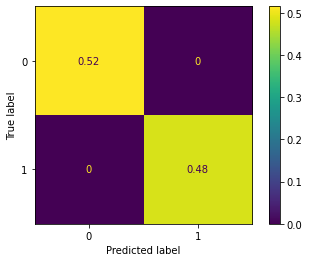

In [114]:
#모델을 fit
rf1.fit(x_train, y_train.values.ravel())
print('accuracy:', rf1.score(x_test, y_test.values.ravel()))

#confusion matrix 출력
y_pred_rf1 = rf1.predict(x_test)
confusion_matrix(y_test, y_pred_rf1)
plot_confusion_matrix(rf1, x_test, y_test.values.ravel(), normalize='all')

#5. 결론

##1. Decision Tree

가장 먼저 실험을 진행했던 모델로, 데이터셋의 feature 자체가 많기도 하고, 순수하게 feature들만을 이용하는 모델이다보니 좋은 성능을 기대하지 않았던 모델이었지만, 예상과는 달리 높은 성능을 보였습니다. 하지만 feature selection을 적용한 결과 모델의 성능이 낮아진 것이 관찰된 것으로 보아, feature의 갯수가 많다보니 model이 overfit된 것이라고 생각했습니다.

##2. Logistic Regression

실험을 시작하기 전에는 Decision Tree보다는 높은 성능을 가질 것이라고 예측했던 모델이었습니다. 하지만 실험 결과에서 알 수 있듯이 오히려 DT보다 낮은 성능을 보였습니다. Classfication에 목적을 두고 있는 model이지만 개념 자체가 regression에서 출발하는 만큼 다른 classification model들보다는 낮은 성능을 보인 것이 아닌가라는 추측을 해보았습니다. 또한. feature selection을 진행한 경우에는 성능이 더 낮아지는 것을 관찰할 수 있었는데, 이는 DT의 경우와 마찬가지로 feature selection을 적용하기 이전의 model이 overfit된 경향을 보이는 것이 아닌가라는 생각을 해보았습니다. 결과적으로 5개의 모델 중 가장 낮은 성능을 보였습니다.

##3. MLP

가장 높은 성능을 보일 것이라고 예상했던 모델이었고, 실제로 실험 결과 높은 성능을 보인 모델이었습니다. 데이터셋의 feature 개수 자체가 많았고, 모델 자체의 특성 때문에 학습과 연산시간이 굉장히 오래 거리는 모델이었습니다. 이 역시 이전 model들처럼 많은 feature들로 인해 overfit된 경향을 보이는 것 같았습니다. 그래서 k-best feature selection을 적용한 결과값을 유의깊게 보았고, 그 결과 동일한 수의 feature에 대하여 DT보다 약간 낮은 성능을 보이는 것으로 관찰되었습니다.

##4. KNeighborsClassifier

KNN의 경우, 100%의 성능은 아니지만 역시 100%에 가까운 성능을 보였습니다. 이 모델 또한 feature selection을 적용한 결과 성능이 줄어들었는데, feature selection을 적용한 결과를 다른 모델들과 비교해보았을 때, Decision Tree와 MLP보다는 낮지만 Logistic Regression보다는 높은 성능을 보였습니다.

##5. Random Forest
DT와 MLP의 경우와 마찬가지로, feature selection을 적용하기 전에는 100%의 성능을 보였고, feature selection을 적용한 후에는 낮아진 성능을 보였습니다. 이 역시 많은 feature 수에 의해 overfit되었다고 판단하였고, k-best feature selection의 결과를 유의깊게 관찰하였습니다. 여러 결정트리를 앙상블하는 방법이기 때문에 DT보다 좋은 성능을 보일 것을 기대했지만 예상과는 달리 Decision Tree와 동일한 성능을 보였습니다.

###데이터셋 자체에서 feature의 수가 많다보니 모든 model에 있어서 학습 과정 중 overfit된 경향을 보인 것 같습니다. 이는 model을 훈련시키기 이전에 data에 대한 충분한 관찰을 통하여 invalid한 feature를 사전에 식별하고 배제하는 전처리 과정이 필요할 것이라고 생각됩니다. 물론 feature selection을 적용하였을 때에는 모델별로 유의한 성능차이를 보였기 때문에 이를 바탕으로 모델들을 비교해보았습니다. 그 결과로 Decision Tree와 Random Forest가 다른 모델들에 비해 높은 성능을 보였습니다. Mushroom 데이터셋 자체가 단순하고, 어떻게 보면 굉장히 정형적인 데이터인데, 이러한 데이터셋의 특성과 위 실험의 결과를 고려해보았을 때 충분히 정형적이고 예측하기 쉬운 데이터셋에 대해서는 MLP나 Random Forest와 같은 복잡한 모델을 적용할 필요 없이 Decision Tree와 같은 단순한 모델을 적용하더라도 충분한 결과, 오히려 더 좋은 결과를 도출해낼 수 있다는 결론을 내릴 수 있었습니다.